In [2]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
videos=pd.read_csv('C:\\Users\personal\youtube-new\CAvideos.csv')
videos

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40876,sGolxsMSGfQ,18.14.06,HOW2: How to Solve a Mystery,Annoying Orange,24,2018-06-13T18:00:07.000Z,"annoying orange|""funny""|""fruit""|""talking""|""ani...",80685,1701,99,1312,https://i.ytimg.com/vi/sGolxsMSGfQ/default.jpg,False,False,False,🚨 NEW MERCH! http://amzn.to/annoyingorange 🚨➤ ...
40877,8HNuRNi8t70,18.14.06,Eli Lik Lik Episode 13 Partie 01,Elhiwar Ettounsi,24,2018-06-13T19:01:18.000Z,"hkayet tounsia|""elhiwar ettounsi""|""denya okhra...",103339,460,66,51,https://i.ytimg.com/vi/8HNuRNi8t70/default.jpg,False,False,False,► Retrouvez vos programmes préférés : https://...
40878,GWlKEM3m2EE,18.14.06,KINGDOM HEARTS III – SQUARE ENIX E3 SHOWCASE 2...,Kingdom Hearts,20,2018-06-11T17:30:53.000Z,"Kingdom Hearts|""KH3""|""Kingdom Hearts 3""|""Froze...",773347,25900,224,3881,https://i.ytimg.com/vi/GWlKEM3m2EE/default.jpg,False,False,False,Find out more about Kingdom Hearts 3: https://...
40879,lbMKLzQ4cNQ,18.14.06,Trump Advisor Grovels To Trudeau,The Young Turks,25,2018-06-13T04:00:05.000Z,"180612__TB02SorryExcuse|""News""|""Politics""|""The...",115225,2115,182,1672,https://i.ytimg.com/vi/lbMKLzQ4cNQ/default.jpg,False,False,False,Peter Navarro isn’t talking so tough now. Ana ...


## dropping unneccessary columns

In [4]:
drop_cols=['comments_disabled','ratings_disabled','video_error_or_removed','thumbnail_link']
videos=videos.drop(drop_cols,axis=1)

## merging the category_id to the categories from the json file

converting the category_id column from type int to type string

In [5]:
videos['category_id']=videos['category_id'].astype(str)

In [6]:
categories_df=pd.read_json('C:\\Users\personal\youtube-new\CA_category_id.json')


In [7]:
ids={}
for category in categories_df['items']:
    ids[category['id']]=category['snippet']['title']
    
videos.insert(4,'category',videos['category_id'].map(ids))

## starting with EDA(Exploritory Data Analysis)

In [8]:
videos

,video_id,trending_date,title,channel_title,category,category_id,publish_time,tags,views,likes,dislikes,comment_count,description
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,Music,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,Eminem's new track Walk on Water ft. Beyoncé i...
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,Comedy,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,STill got a lot of packages. Probably will las...
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,Comedy,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,Entertainment,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,I know it's been a while since we did this sho...
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,Music,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
40876,sGolxsMSGfQ,18.14.06,HOW2: How to Solve a Mystery,Annoying Orange,Entertainment,24,2018-06-13T18:00:07.000Z,"annoying orange|""funny""|""fruit""|""talking""|""ani...",80685,1701,99,1312,🚨 NEW MERCH! http://amzn.to/annoyingorange 🚨➤ ...
40877,8HNuRNi8t70,18.14.06,Eli Lik Lik Episode 13 Partie 01,Elhiwar Ettounsi,Entertainment,24,2018-06-13T19:01:18.000Z,"hkayet tounsia|""elhiwar ettounsi""|""denya okhra...",103339,460,66,51,► Retrouvez vos programmes préférés : https://...
40878,GWlKEM3m2EE,18.14.06,KINGDOM HEARTS III – SQUARE ENIX E3 SHOWCASE 2...,Kingdom Hearts,Gaming,20,2018-06-11T17:30:53.000Z,"Kingdom Hearts|""KH3""|""Kingdom Hearts 3""|""Froze...",773347,25900,224,3881,Find out more about Kingdom Hearts 3: https://...
40879,lbMKLzQ4cNQ,18.14.06,Trump Advisor Grovels To Trudeau,The Young Turks,News & Politics,25,2018-06-13T04:00:05.000Z,"180612__TB02SorryExcuse|""News""|""Politics""|""The...",115225,2115,182,1672,Peter Navarro isn’t talking so tough now. Ana ...


In [9]:
videos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40881 entries, 0 to 40880
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   video_id       40881 non-null  object
 1   trending_date  40881 non-null  object
 2   title          40881 non-null  object
 3   channel_title  40881 non-null  object
 4   category       40807 non-null  object
 5   category_id    40881 non-null  object
 6   publish_time   40881 non-null  object
 7   tags           40881 non-null  object
 8   views          40881 non-null  int64 
 9   likes          40881 non-null  int64 
 10  dislikes       40881 non-null  int64 
 11  comment_count  40881 non-null  int64 
 12  description    39585 non-null  object
dtypes: int64(4), object(9)
memory usage: 4.1+ MB


In [10]:
videos=videos.dropna(how='any')

In [11]:
videos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39515 entries, 0 to 40880
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   video_id       39515 non-null  object
 1   trending_date  39515 non-null  object
 2   title          39515 non-null  object
 3   channel_title  39515 non-null  object
 4   category       39515 non-null  object
 5   category_id    39515 non-null  object
 6   publish_time   39515 non-null  object
 7   tags           39515 non-null  object
 8   views          39515 non-null  int64 
 9   likes          39515 non-null  int64 
 10  dislikes       39515 non-null  int64 
 11  comment_count  39515 non-null  int64 
 12  description    39515 non-null  object
dtypes: int64(4), object(9)
memory usage: 4.2+ MB


In [12]:
videos

,video_id,trending_date,title,channel_title,category,category_id,publish_time,tags,views,likes,dislikes,comment_count,description
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,Music,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,Eminem's new track Walk on Water ft. Beyoncé i...
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,Comedy,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,STill got a lot of packages. Probably will las...
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,Comedy,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,Entertainment,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,I know it's been a while since we did this sho...
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,Music,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
40876,sGolxsMSGfQ,18.14.06,HOW2: How to Solve a Mystery,Annoying Orange,Entertainment,24,2018-06-13T18:00:07.000Z,"annoying orange|""funny""|""fruit""|""talking""|""ani...",80685,1701,99,1312,🚨 NEW MERCH! http://amzn.to/annoyingorange 🚨➤ ...
40877,8HNuRNi8t70,18.14.06,Eli Lik Lik Episode 13 Partie 01,Elhiwar Ettounsi,Entertainment,24,2018-06-13T19:01:18.000Z,"hkayet tounsia|""elhiwar ettounsi""|""denya okhra...",103339,460,66,51,► Retrouvez vos programmes préférés : https://...
40878,GWlKEM3m2EE,18.14.06,KINGDOM HEARTS III – SQUARE ENIX E3 SHOWCASE 2...,Kingdom Hearts,Gaming,20,2018-06-11T17:30:53.000Z,"Kingdom Hearts|""KH3""|""Kingdom Hearts 3""|""Froze...",773347,25900,224,3881,Find out more about Kingdom Hearts 3: https://...
40879,lbMKLzQ4cNQ,18.14.06,Trump Advisor Grovels To Trudeau,The Young Turks,News & Politics,25,2018-06-13T04:00:05.000Z,"180612__TB02SorryExcuse|""News""|""Politics""|""The...",115225,2115,182,1672,Peter Navarro isn’t talking so tough now. Ana ...


In [13]:
videos.describe()

,views,likes,dislikes,comment_count
count,3.951500e+04,3.951500e+04,3.951500e+04,3.951500e+04
mean,1.168417e+06,4.041073e+04,2.003502e+03,5.087430e+03
std,3.435357e+06,1.333917e+05,1.883941e+04,2.099052e+04
min,7.330000e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.499950e+05,2.403500e+03,1.040000e+02,4.440000e+02
50%,3.834950e+05,9.276000e+03,3.150000e+02,1.358000e+03
75%,9.832040e+05,2.970300e+04,9.770000e+02,3.823000e+03
max,1.378431e+08,5.053338e+06,1.602383e+06,1.114800e+06


In [14]:
videos.head()

,video_id,trending_date,title,channel_title,category,category_id,publish_time,tags,views,likes,dislikes,comment_count,description
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,Music,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,Eminem's new track Walk on Water ft. Beyoncé i...
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,Comedy,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,STill got a lot of packages. Probably will las...
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,Comedy,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,Entertainment,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,I know it's been a while since we did this sho...
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,Music,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...


## converting the publish_time column into datetime

In [15]:
videos['publish_time']=pd.to_datetime(videos['publish_time'])

<ipython-input-15-bb69aa785e41>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  videos['publish_time']=pd.to_datetime(videos['publish_time'])


In [16]:
videos.head()

,video_id,trending_date,title,channel_title,category,category_id,publish_time,tags,views,likes,dislikes,comment_count,description
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,Music,10,2017-11-10 17:00:03+00:00,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,Eminem's new track Walk on Water ft. Beyoncé i...
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,Comedy,23,2017-11-13 17:00:00+00:00,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,STill got a lot of packages. Probably will las...
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,Comedy,23,2017-11-12 19:05:24+00:00,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,Entertainment,24,2017-11-12 18:01:41+00:00,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,I know it's been a while since we did this sho...
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,Music,10,2017-11-09 11:04:14+00:00,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...


## creating column for day name, month name and year


In [17]:
videos['publish_day']=videos['publish_time'].dt.day_name()

<ipython-input-17-7bd80c49de9b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  videos['publish_day']=videos['publish_time'].dt.day_name()


In [18]:
videos['publish_month']=videos['publish_time'].dt.month_name()

<ipython-input-18-04f6bb0aaffb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  videos['publish_month']=videos['publish_time'].dt.month_name()


In [66]:
videos['publish_year']=videos['publish_time'].dt.year

<ipython-input-66-130d0773953b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  videos['publish_year']=videos['publish_time'].dt.year


In [70]:
videos.head(10)

,video_id,trending_date,title,channel_title,category,category_id,publish_time,tags,views,likes,dislikes,comment_count,description,publish_day,publish_month,Country,publish_year
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,Music,10,2017-11-10 17:00:03+00:00,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,Eminem's new track Walk on Water ft. Beyoncé i...,Friday,November,CA,2017
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,Comedy,23,2017-11-13 17:00:00+00:00,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,STill got a lot of packages. Probably will las...,Monday,November,CA,2017
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,Comedy,23,2017-11-12 19:05:24+00:00,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,Sunday,November,CA,2017
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,Entertainment,24,2017-11-12 18:01:41+00:00,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,I know it's been a while since we did this sho...,Sunday,November,CA,2017
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,Music,10,2017-11-09 11:04:14+00:00,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...,Thursday,November,CA,2017
5,0yIWz1XEeyc,17.14.11,Jake Paul Says Alissa Violet CHEATED with LOGA...,DramaAlert,News & Politics,25,2017-11-13 07:37:51+00:00,"#DramaAlert|""Drama""|""Alert""|""DramaAlert""|""keem...",1309699,103755,4613,12143,► Follow for News! - https://twitter.com/KEEMS...,Monday,November,CA,2017
6,_uM5kFfkhB8,17.14.11,Vanoss Superhero School - New Students,VanossGaming,Comedy,23,2017-11-12 23:52:13+00:00,"Funny Moments|""Montage video games""|""gaming""|""...",2987945,187464,9850,26629,Vanoss Merch Shop: https://vanoss.3blackdot.co...,Sunday,November,CA,2017
7,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,People & Blogs,22,2017-11-13 17:13:01+00:00,SHANtell martin,748374,57534,2967,15959,SHANTELL'S CHANNEL - https://www.youtube.com/s...,Monday,November,CA,2017
8,JzCsM1vtn78,17.14.11,THE LOGANG MADE HISTORY. LOL. AGAIN.,Logan Paul Vlogs,Entertainment,24,2017-11-12 20:19:24+00:00,"logan paul vlog|""logan paul""|""logan""|""paul""|""o...",4477587,292837,4123,36391,Join the movement. Be a Maverick ► https://Sho...,Sunday,November,CA,2017
9,43sm-QwLcx4,17.14.11,Finally Sheldon is winning an argument about t...,Sheikh Musa,People & Blogs,22,2017-11-10 14:10:46+00:00,"God|""Sheldon Cooper""|""Young Sheldon""",505161,4135,976,1484,Sheldon is roasting pastor of the church\nyoun...,Friday,November,CA,2017


In [20]:
videos[['publish_month','description']].head()

,publish_month,description
0,November,Eminem's new track Walk on Water ft. Beyoncé i...
1,November,STill got a lot of packages. Probably will las...
2,November,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,November,I know it's been a while since we did this sho...
4,November,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...


##  Q1: what Month had the highest views

In [21]:
months= videos.groupby('publish_month').sum()

In [22]:
months.describe()

,views,likes,dislikes,comment_count
count,1.200000e+01,1.200000e+01,1.200000e+01,1.200000e+01
mean,3.847499e+09,1.330692e+08,6.597365e+06,1.675248e+07
std,3.118244e+09,1.081201e+08,6.282595e+06,1.381182e+07
min,1.246732e+06,1.237500e+04,1.950000e+02,1.244000e+03
25%,1.907010e+07,4.042462e+05,3.012375e+04,6.904300e+04
50%,5.053551e+09,1.802358e+08,7.613880e+06,2.180956e+07
75%,6.189990e+09,1.985414e+08,8.939320e+06,2.498329e+07
max,7.936018e+09,2.742721e+08,2.080369e+07,3.640916e+07


In [23]:
months

,views,likes,dislikes,comment_count
publish_month,,,,
April,5353876781,188692468,7711251,22222787
August,1246732,15566,558,1356
December,7355122802,270104590,20803687,35612572
February,6091454519,188385395,7516510,22099957
January,5458037677,193524257,8921956,25408829
July,2536355,12375,195,1244
June,2702220897,95474355,4282250,12815851
March,6485595269,213592985,8991412,24841441
May,7936018208,274272072,12748851,36409157


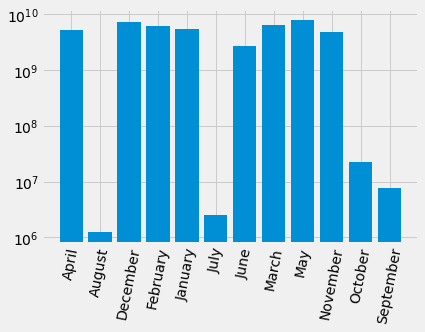

In [24]:
plt.style.use('fivethirtyeight')
plt.bar(months.index,months['views'],log=True)
plt.xticks(rotation=79)
plt.grid(True)
plt.show()

## May had more views than any other month followed by December

In [25]:
filt=videos['publish_month'] == 'August'
videos[filt]['video_id'].count()

5

## August had the lowest views because 5 videos were released on august

## videos that trended on the same day

In [26]:
same=videos[videos['trending_date'].duplicated(keep=False)]

In [27]:
same['same_day']=same.groupby('trending_date')['title'].transform(lambda x: ','.join(x))
same=same[['trending_date','same_day']].drop_duplicates()

In [28]:
same.head(10)

,trending_date,same_day
0,17.14.11,"Eminem - Walk On Water (Audio) ft. Beyoncé,PLU..."
200,17.15.11,"PLUSH - Bad Unboxing Fan Mail,Selling My iPhon..."
400,17.16.11,"Deadpool’s “Wet on Wet” Teaser,The New SpotMin..."
600,17.17.11,"Deadpool’s “Wet on Wet” Teaser,Spill Your Guts..."
800,17.18.11,"Deadpool’s “Wet on Wet” Teaser,Spill Your Guts..."
1000,17.19.11,"Incredibles 2 Official Teaser Trailer,Deadpool..."
1199,17.20.11,"Incredibles 2 Official Teaser Trailer,R.I.P Ar..."
1399,17.21.11,"Incredibles 2 Official Teaser Trailer,Funny Ja..."
1599,17.22.11,Stranger Things Cast Answer the Web's Most Sea...
1799,17.23.11,Stranger Things Cast Answer the Web's Most Sea...


##  Q2: What day had the highest number of video release

In [29]:
days=videos['publish_day'].value_counts()
days

Friday       6737
Thursday     5800
Tuesday      5695
Monday       5645
Wednesday    5358
Sunday       5235
Saturday     5045
Name: publish_day, dtype: int64

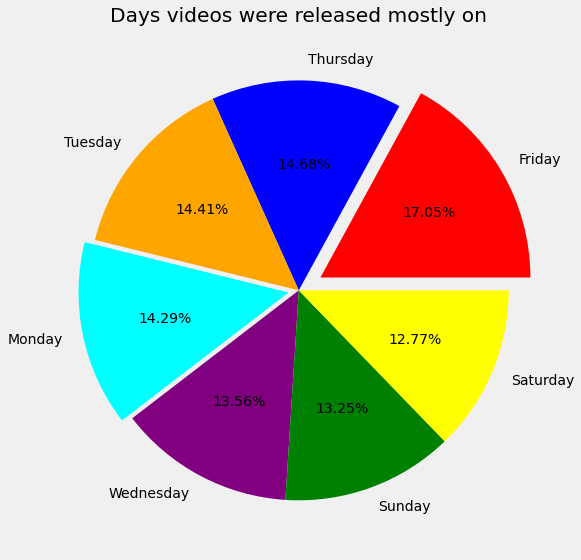

In [30]:
plt.figure(figsize=(12,9))
plt.pie(days,labels=days.index,autopct='%1.2f%%',
        explode=(.12,0,0,.05,0,0,0), colors=['red','blue','orange','cyan','purple','green','yellow'])
plt.title('Days videos were released mostly on')
plt.show()

## videos were published more on friday compared to other days 

## Q3:Days with the highest views

In [31]:
g_days=videos.groupby('publish_day').sum()
g_days

,views,likes,dislikes,comment_count
publish_day,,,,
Friday,9788133643,379580248,15190930,46242204
Monday,6166955494,197919392,9294707,23726742
Saturday,4647434139,161143378,6993621,22124419
Sunday,5346992675,182582818,8531223,23577011
Thursday,6977014366,252402630,12541417,29027065
Tuesday,6482556323,208499353,9592121,25926898
Wednesday,6760899262,214702167,17024361,30405438


In [32]:
g_days.sort_values(by='views',ascending=False)

,views,likes,dislikes,comment_count
publish_day,,,,
Friday,9788133643,379580248,15190930,46242204
Thursday,6977014366,252402630,12541417,29027065
Wednesday,6760899262,214702167,17024361,30405438
Tuesday,6482556323,208499353,9592121,25926898
Monday,6166955494,197919392,9294707,23726742
Sunday,5346992675,182582818,8531223,23577011
Saturday,4647434139,161143378,6993621,22124419


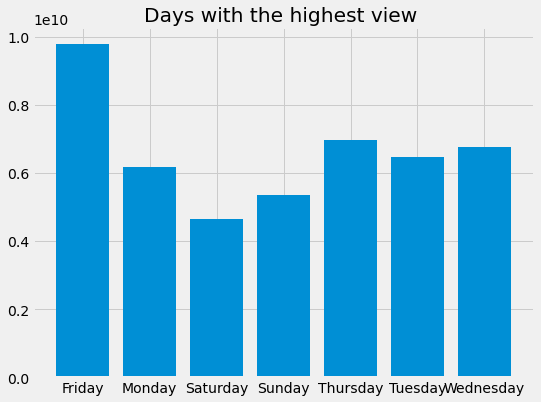

In [33]:
plt.figure(figsize=(8,6))
plt.title('Days with the highest view ')
plt.bar(g_days.index,g_days['views'])
plt.show()

Friday had the highest views

In [34]:
nov=videos.groupby('publish_month')
nov['publish_day'].value_counts()

publish_month  publish_day
April          Friday         813
               Monday         780
               Sunday         652
               Thursday       649
               Tuesday        618
                             ... 
October        Wednesday        1
September      Thursday         5
               Tuesday          3
               Wednesday        3
               Sunday           2
Name: publish_day, Length: 67, dtype: int64

In [35]:
videos['category_id'].value_counts()

24    13173
25     3868
22     3726
23     3725
10     3695
17     2650
1      2001
26     1998
20     1330
28     1143
27      982
19      377
15      369
2       348
43      124
30        6
Name: category_id, dtype: int64

In [36]:
videos['Country']='CA'

<ipython-input-36-b0b401088a38>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  videos['Country']='CA'


In [37]:
videos

,video_id,trending_date,title,channel_title,category,category_id,publish_time,tags,views,likes,dislikes,comment_count,description,publish_day,publish_month,Country
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,Music,10,2017-11-10 17:00:03+00:00,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,Eminem's new track Walk on Water ft. Beyoncé i...,Friday,November,CA
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,Comedy,23,2017-11-13 17:00:00+00:00,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,STill got a lot of packages. Probably will las...,Monday,November,CA
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,Comedy,23,2017-11-12 19:05:24+00:00,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,Sunday,November,CA
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,Entertainment,24,2017-11-12 18:01:41+00:00,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,I know it's been a while since we did this sho...,Sunday,November,CA
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,Music,10,2017-11-09 11:04:14+00:00,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...,Thursday,November,CA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40876,sGolxsMSGfQ,18.14.06,HOW2: How to Solve a Mystery,Annoying Orange,Entertainment,24,2018-06-13 18:00:07+00:00,"annoying orange|""funny""|""fruit""|""talking""|""ani...",80685,1701,99,1312,🚨 NEW MERCH! http://amzn.to/annoyingorange 🚨➤ ...,Wednesday,June,CA
40877,8HNuRNi8t70,18.14.06,Eli Lik Lik Episode 13 Partie 01,Elhiwar Ettounsi,Entertainment,24,2018-06-13 19:01:18+00:00,"hkayet tounsia|""elhiwar ettounsi""|""denya okhra...",103339,460,66,51,► Retrouvez vos programmes préférés : https://...,Wednesday,June,CA
40878,GWlKEM3m2EE,18.14.06,KINGDOM HEARTS III – SQUARE ENIX E3 SHOWCASE 2...,Kingdom Hearts,Gaming,20,2018-06-11 17:30:53+00:00,"Kingdom Hearts|""KH3""|""Kingdom Hearts 3""|""Froze...",773347,25900,224,3881,Find out more about Kingdom Hearts 3: https://...,Monday,June,CA
40879,lbMKLzQ4cNQ,18.14.06,Trump Advisor Grovels To Trudeau,The Young Turks,News & Politics,25,2018-06-13 04:00:05+00:00,"180612__TB02SorryExcuse|""News""|""Politics""|""The...",115225,2115,182,1672,Peter Navarro isn’t talking so tough now. Ana ...,Wednesday,June,CA


##  Q4: Which channel had the most 
    

## i: channel with the most trending video

In [38]:
grouped_chan=videos.groupby('channel_title').sum()
chan=grouped_chan.sort_values(by='views',ascending=True).tail(5)

In [39]:
chan

,views,likes,dislikes,comment_count
channel_title,,,,
ibighit,511567918,50259874,912931,9156753
YouTube Spotlight,635976769,16879595,8898520,5406288
Dude Perfect,729916338,28298398,590686,2096231
T-Series,799114025,15856204,1067612,1144248
Marvel Entertainment,1011420205,32892782,606296,4123846


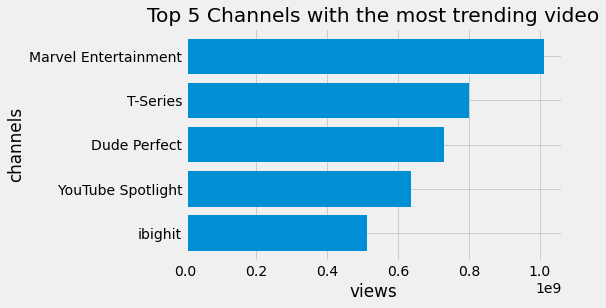

In [40]:
plt.barh(chan.index,chan['views'])
plt.title('Top 5 Channels with the most trending video')
plt.ylabel('channels')
plt.xlabel('views')
plt.show()

## Q4. ii: Top 10 most commented channels

In [41]:
most_commented=grouped_chan.sort_values(by='comment_count',ascending=True).tail(10)
most_commented

,views,likes,dislikes,comment_count
channel_title,,,,
EminemVEVO,326643776,18160439,626363,1801692
jacksfilms,79401369,5822773,135728,1898592
Philip DeFranco,208288954,10458884,284200,1958231
The Game Theorists,155020685,7171426,351162,2007590
Dude Perfect,729916338,28298398,590686,2096231
Jake Paul,225444096,10207037,4625402,3000741
PewDiePie,461700524,33596931,902236,3869088
Marvel Entertainment,1011420205,32892782,606296,4123846
YouTube Spotlight,635976769,16879595,8898520,5406288


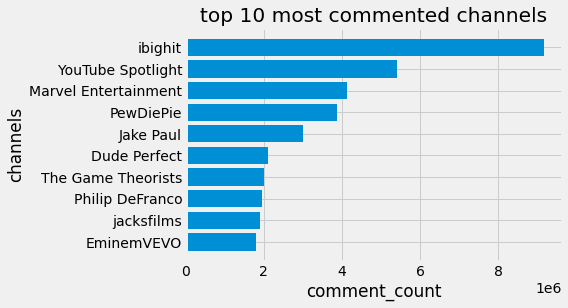

In [42]:
plt.barh(most_commented.index,most_commented['comment_count'])
plt.title('top 10 most commented channels')
plt.ylabel('channels')
plt.xlabel('comment_count')
plt.show()

## Q4. iii: 10 Most liked channels

In [43]:
most_liked_chan=grouped_chan.sort_values(by='likes',ascending=False).head(10)
most_liked_chan

,views,likes,dislikes,comment_count
channel_title,,,,
ibighit,511567918,50259874,912931,9156753
PewDiePie,461700524,33596931,902236,3869088
Marvel Entertainment,1011420205,32892782,606296,4123846
Dude Perfect,729916338,28298398,590686,2096231
Ed Sheeran,385566686,18483506,316523,924967
TaylorSwiftVEVO,374678625,18271131,962785,1641238
EminemVEVO,326643776,18160439,626363,1801692
YouTube Spotlight,635976769,16879595,8898520,5406288
T-Series,799114025,15856204,1067612,1144248


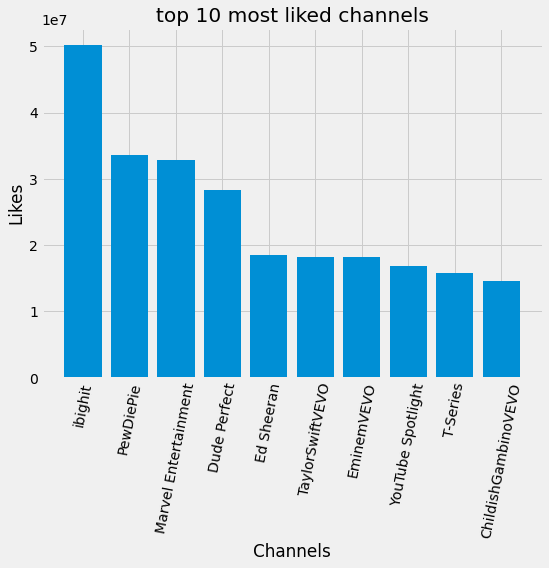

In [44]:
plt.figure(figsize=(8,6))
plt.bar(most_liked_chan.index,most_liked_chan['likes'])
plt.title('top 10 most liked channels')
plt.xlabel('Channels')
plt.ylabel('Likes')
plt.xticks(rotation=79)
plt.show()

## Q4.iv: 5 most disliked channels

In [45]:
disliked_chan=grouped_chan.sort_values(by='dislikes',ascending=False).head(5)
disliked_chan

,views,likes,dislikes,comment_count
channel_title,,,,
YouTube Spotlight,635976769,16879595,8898520,5406288
Jake Paul,225444096,10207037,4625402,3000741
T-Series,799114025,15856204,1067612,1144248
TaylorSwiftVEVO,374678625,18271131,962785,1641238
ibighit,511567918,50259874,912931,9156753


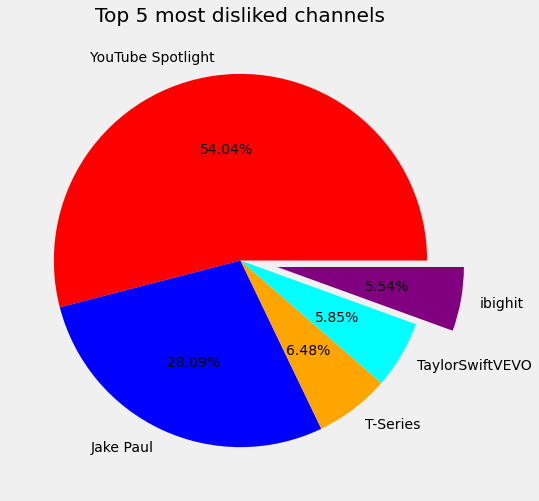

In [46]:
plt.figure(figsize=(12,8))
plt.title('Top 5 most disliked channels')
plt.pie(disliked_chan['dislikes'],labels=disliked_chan.index,autopct='%1.2f%%',
        colors=['red','blue','orange','cyan','purple'],explode=[0,0,0,0,.20])
plt.show()

## Q5. i:  5 videos with the highest views

In [48]:
grouped_title=videos.groupby('title').sum()

In [49]:
highest_views=grouped_title.sort_values(by='views',ascending=True).tail(5)
highest_views

,views,likes,dislikes,comment_count
title,,,,
VENOM - Official Trailer (HD),268913813,6993004,238659,772359
BTS (방탄소년단) 'FAKE LOVE' Official MV,321743622,23078610,655599,4838370
Childish Gambino - This Is America (Official Video),411775069,14593916,689948,1545142
Marvel Studios' Avengers: Infinity War Official Trailer,577553186,18929848,348741,2556491
YouTube Rewind: The Shape of 2017 | #YouTubeRewind,631428335,16687951,8468160,5087713


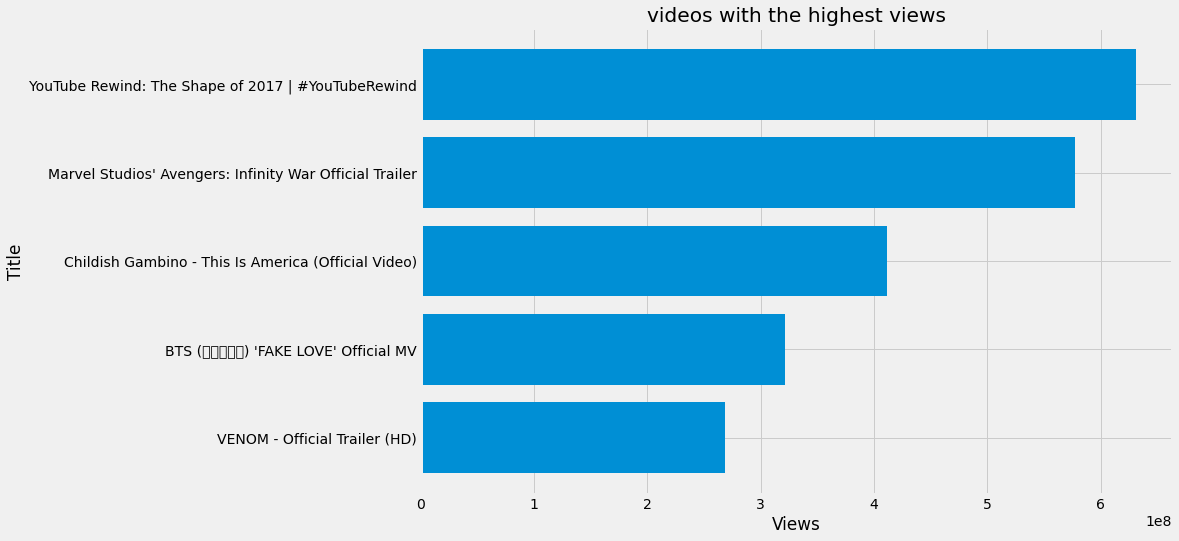

In [90]:
plt.figure(figsize=(12,8))
plt.barh(highest_views.index,highest_views['views'])
plt.title('videos with the highest views')
plt.ylabel('Title')
plt.xlabel('Views')
plt.show()

## Q5. ii: 5 most liked videos

In [51]:
most_liked=grouped_title.sort_values(by='likes',ascending=False)
most_liked.head()

,views,likes,dislikes,comment_count
title,,,,
BTS (방탄소년단) 'FAKE LOVE' Official MV,321743622,23078610,655599,4838370
Marvel Studios' Avengers: Infinity War Official Trailer,577553186,18929848,348741,2556491
YouTube Rewind: The Shape of 2017 | #YouTubeRewind,631428335,16687951,8468160,5087713
Childish Gambino - This Is America (Official Video),411775069,14593916,689948,1545142
Drake - God’s Plan,190183754,12164958,136533,800534


## Q5.iii: 5 most disliked videos

In [52]:
most_disliked=grouped_title.sort_values(by='dislikes', ascending=True).tail()
most_disliked.iloc[1]['views']

411775069

In [53]:
most_disliked

,views,likes,dislikes,comment_count
title,,,,
BTS (방탄소년단) 'FAKE LOVE' Official MV,321743622,23078610,655599,4838370
Childish Gambino - This Is America (Official Video),411775069,14593916,689948,1545142
Fergie Performs The U.S. National Anthem / 2018 NBA All-Star Game,100129516,245389,818658,309347
Jake Paul - It's Everyday Bro (Remix) [feat. Gucci Mane],53616008,2221871,2117354,832693
YouTube Rewind: The Shape of 2017 | #YouTubeRewind,631428335,16687951,8468160,5087713


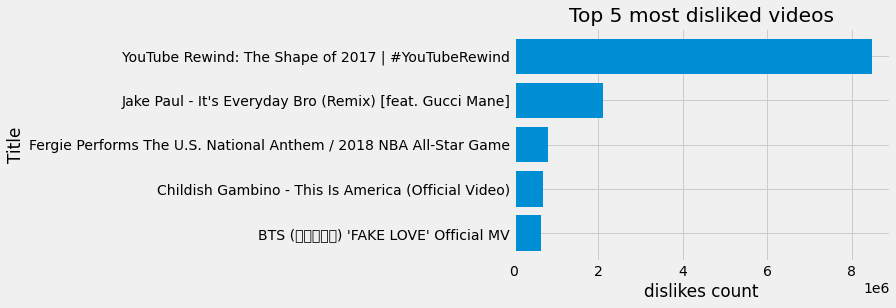

In [89]:
plt.barh(most_disliked.index,most_disliked['dislikes'])
plt.title('Top 5 most disliked videos')
plt.ylabel('Title')
plt.xlabel('dislikes count')
plt.show()

## Q5. iv: 5 videos with the most comment 

In [55]:
most_comments=grouped_title.sort_values(by='comment_count', ascending=False).head(5)
most_comments

,views,likes,dislikes,comment_count
title,,,,
YouTube Rewind: The Shape of 2017 | #YouTubeRewind,631428335,16687951,8468160,5087713
BTS (방탄소년단) 'FAKE LOVE' Official MV,321743622,23078610,655599,4838370
Marvel Studios' Avengers: Infinity War Official Trailer,577553186,18929848,348741,2556491
BTS (방탄소년단) 'MIC Drop (Steve Aoki Remix)' Official MV,86811197,9373576,135369,1894345
Childish Gambino - This Is America (Official Video),411775069,14593916,689948,1545142


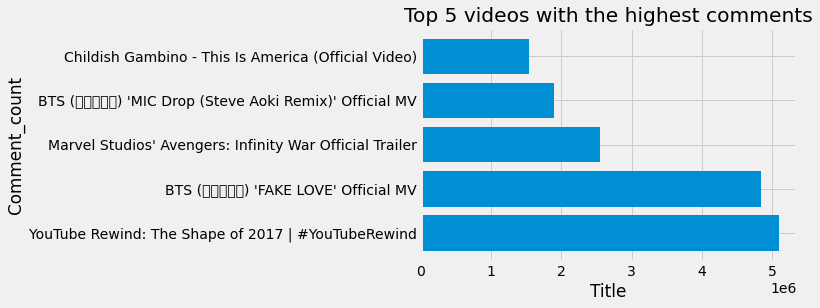

In [88]:
plt.barh(most_comments.index,most_comments['comment_count'])
plt.title('Top 5 videos with the highest comments')
plt.xlabel('Title')
plt.ylabel('Comment_count')
plt.show()

## Q6: check for the most viewed category

In [57]:
viewed_category=videos.groupby('category').sum().sort_values(by='views',ascending=False).head()

In [58]:
viewed_category

,views,likes,dislikes,comment_count
category,,,,
Entertainment,13539655523,385612477,25660825,55044622
Music,13142762605,562950999,22064769,52293858
Comedy,3684525657,194794035,5341733,19407804
People & Blogs,3082588063,101413106,9296718,16221859
Film & Animation,2920949398,77693165,3104400,10073059


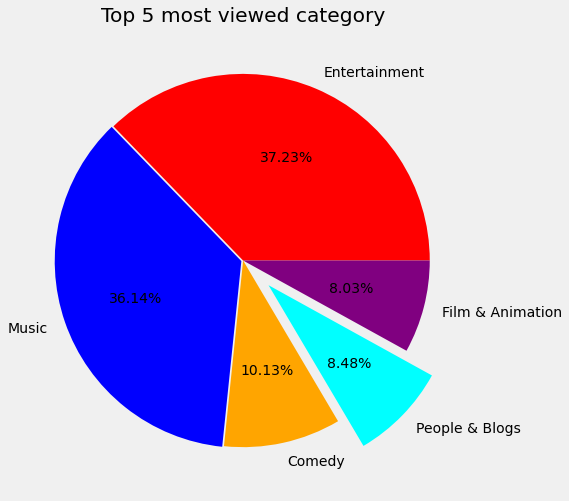

In [59]:
plt.figure(figsize=(12,8))
plt.title('Top 5 most viewed category')
plt.pie(viewed_category['views'],labels=viewed_category.index,autopct='%1.2f%%',
        colors=['red','blue','orange','cyan','purple'], explode=[0,.01,0,.19,0])
plt.show()

In [60]:
viewed_category['views'].index


Index(['Entertainment', 'Music', 'Comedy', 'People & Blogs',
       'Film & Animation'],
      dtype='object', name='category')

In [61]:
videos.sample(10)

,video_id,trending_date,title,channel_title,category,category_id,publish_time,tags,views,likes,dislikes,comment_count,description,publish_day,publish_month,Country
25041,9IAb2ZykbHw,18.21.03,12 ASTUCES POUR CACHER LA NOURRITURE À MANGER ...,Troom Troom FR,Howto & Style,26,2018-03-20 13:00:01+00:00,"farces|""farces drôles""|""comment se faufiler en...",238530,6965,277,816,Abonnez-vous ici : https://goo.gl/1LHrhX\nSABL...,Tuesday,March,CA
27254,q1L-I53o3Iw,18.01.04,【宇哥】外婆用这种方式切蛋糕，没想到桌下有人，悲剧了…英国神剧《9号秘事：外婆的派对》,宇哥讲电影,Film & Animation,1,2018-03-31 02:05:45+00:00,"搞笑|""恶作剧""|""悬疑""|""惊悚""|""喜剧片""|""反转""|""讽刺""|""家庭""|""几分钟看电...",138547,1199,101,115,《9号秘事》（Inside No. 9）是由大卫·科尔，吉列尔莫·莫拉莱斯导演，绅士联盟成员...,Saturday,March,CA
39613,1-EtUdRLJ60,18.08.06,Kane Brown - Lose It (Audio),KaneBrownVEVO,Music,10,2018-06-07 07:00:02+00:00,"heaven|""chris young""|""losing sleep""|""lauren al...",261370,14614,231,765,"Kane Brown’s new single, “Lose It,” is availab...",Thursday,June,CA
37273,WL3TBpXE5JA,18.27.05,UFC Fight Night Liverpool: Weigh-in,UFC - Ultimate Fighting Championship,Sports,17,2018-05-26 14:29:13+00:00,"ufc|""mma""|""ufc fight night""|""fight night liver...",225869,2430,81,755,Watch the Fight Night Liverpool Weigh-in on Sa...,Saturday,May,CA
14409,q8XzWBadFiU,18.27.01,The Secretive FBI Secret Society Is No Longer ...,The Late Show with Stephen Colbert,Entertainment,24,2018-01-26 08:35:00+00:00,"The Late Show|""Stephen Colbert""|""Colbert""|""Lat...",641684,8299,563,1338,Newly released text messages between FBI agent...,Friday,January,CA
4891,6FXjtnVrvMM,17.08.12,8 Wine Gadgets put to the Test!,CrazyRussianHacker,Science & Technology,28,2017-12-07 22:43:54+00:00,"Gadgets|""Wine Gadgets""|""8 Wine Gadgets put to ...",303860,9539,299,1061,Get your CrazyRussianHacker merch! - https://c...,Thursday,December,CA
5905,d67Z5cMAXOs,17.13.12,A Boogie Wit Da Hoodie - Beast Mode feat. PnB ...,A-Boogie Wit Da Hoodie,Film & Animation,1,2017-12-12 16:17:40+00:00,"A Boogie|""A Boogie Wit Da Hoodie""|""PnB Rock""|""...",351972,24923,329,2068,A Boogie Wit Da Hoodie - Beast Mode feat. PnB ...,Tuesday,December,CA
14484,Z-N6-I9fhsc,18.27.01,عبد العالي لمهر(طاليس) في قفص الاتهام.. الحلقة...,kifache.tv,News & Politics,25,2018-01-26 21:29:14+00:00,[none],88500,2469,108,395,كيفاش تيفي www.kifache.tv,Friday,January,CA
9397,e-0YnJlFPeE,17.31.12,Sharry Mann- Love You (Full Video Song) | Parm...,Lokdhun Punjabi,Music,10,2017-12-30 04:30:01+00:00,"sharry mann|""sharry mann latest song""|""parmish...",3575912,102262,2958,5842,Presenting Sharry Mann latest Punjabi Song Lo...,Saturday,December,CA
3792,ykHeGtN4m94,17.02.12,"Love, Simon | Official Trailer [HD] | 20th Cen...",20th Century Fox,Film & Animation,1,2017-11-28 21:28:53+00:00,"Trailer|""Nick Robinson""|""Katherine Langford""|""...",2493439,58276,2835,4510,Everyone deserves a great love story. But for ...,Tuesday,November,CA


## Years with the highest views

In [71]:
videos.publish_year.unique()

array([2017, 2009, 2016, 2014, 2015, 2013, 2008, 2010, 2018, 2012],
      dtype=int64)

In [80]:
years=videos.groupby('publish_year').sum().sort_values('views',ascending=False)

In [81]:
years

,views,likes,dislikes,comment_count
publish_year,,,,
2018,34019499849,1153876617,50168574,143792895
2017,12139121107,442889280,28996189,57231057
2013,3986792,20673,514,1792
2010,1997620,14066,2050,932
2008,1792775,8791,473,1364
2014,1455637,5022,239,416
2016,1189280,9361,210,553
2015,674208,5686,125,714
2009,264577,487,5,48


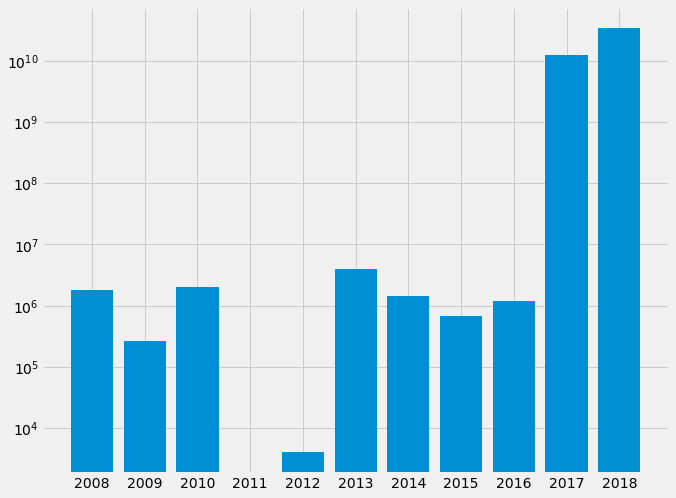

In [86]:
plt.figure(figsize=(10,8))
plt.bar(years.index , years['views'],log=True)
plt.xticks([2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018])
plt.show()